In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import cifar10
(X_train,y_train), (X_test,y_test) = cifar10.load_data()

Using TensorFlow backend.


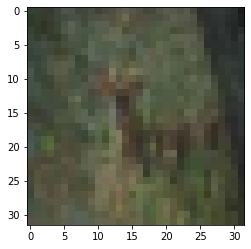

In [3]:
# Sample image
plt.imshow(X_train[10])

In [4]:
print("Shape of training dataset", X_train.shape)
print("Shape of test dataset", X_test.shape)
# Hence 50000 training and 10000 test images to train on. Resolution is low, and hence the images are not so clear

Shape of training dataset (50000, 32, 32, 3)
Shape of test dataset (10000, 32, 32, 3)


In [5]:
# Keras expects float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [6]:
# Range is now in between 0 and 1
X_train /= 255
X_test /= 255

In [7]:
# Keras expects one hot encoding
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import adam

model = Sequential()

#add() takes layer instances. Ones that you imported in keras.layers
input_shape = X_train.shape[1:]

#Add cnn layers
model.add(Conv2D(32,kernel_size = (3,3), activation = 'relu',input_shape = input_shape))

model.add(Conv2D(64,kernel_size= (3,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128,kernel_size= (3,3), activation='relu'))
model.add(Conv2D(256,kernel_size= (3,3), activation='relu'))

model.add(Dropout(0.10))
model.add(MaxPooling2D())

model.add(Dropout(0.40))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D())
#Add dense layers
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))

model.add(Dropout(0.40))

model.add(Dense(y_train.shape[1],activation = 'softmax'))

print(model.summary())

model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 256)       295168    
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 10, 256)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 256)        

In [9]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1)


history = model.fit(x=X_train, y=y_train, batch_size=64, epochs=70,verbose =1, validation_data=(X_test,y_test), callbacks = [es])
score = model.evaluate(X_test,y_test,verbose=0)
print('Test loss',score[0])
print('Test accuracy',score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/70
50000/50000 [==============================] - 15s 296us/step - loss: 1.7537 - accuracy: 0.3453 - val_loss: 1.3591 - val_accuracy: 0.5286
Epoch 2/70
50000/50000 [==============================] - 12s 237us/step - loss: 1.3179 - accuracy: 0.5355 - val_loss: 1.1578 - val_accuracy: 0.5851
Epoch 3/70
50000/50000 [==============================] - 12s 238us/step - loss: 1.1384 - accuracy: 0.6058 - val_loss: 1.0112 - val_accuracy: 0.6509
Epoch 4/70
50000/50000 [==============================] - 12s 239us/step - loss: 1.0139 - accuracy: 0.6539 - val_loss: 0.8978 - val_accuracy: 0.6904
Epoch 5/70
50000/50000 [==============================] - 12s 238us/step - loss: 0.9153 - accuracy: 0.6870 - val_loss: 0.8650 - val_accuracy: 0.7084
Epoch 6/70
50000/50000 [==============================] - 12s 238us/step - loss: 0.8509 - accuracy: 0.7108 - val_loss: 0.7857 - val_accuracy: 0.7322
Epoch 7/70
50000/50000 [==============================] 

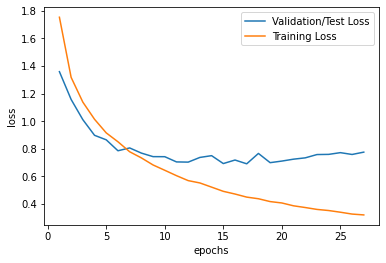

In [10]:
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

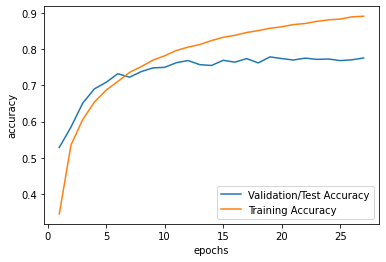

In [11]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

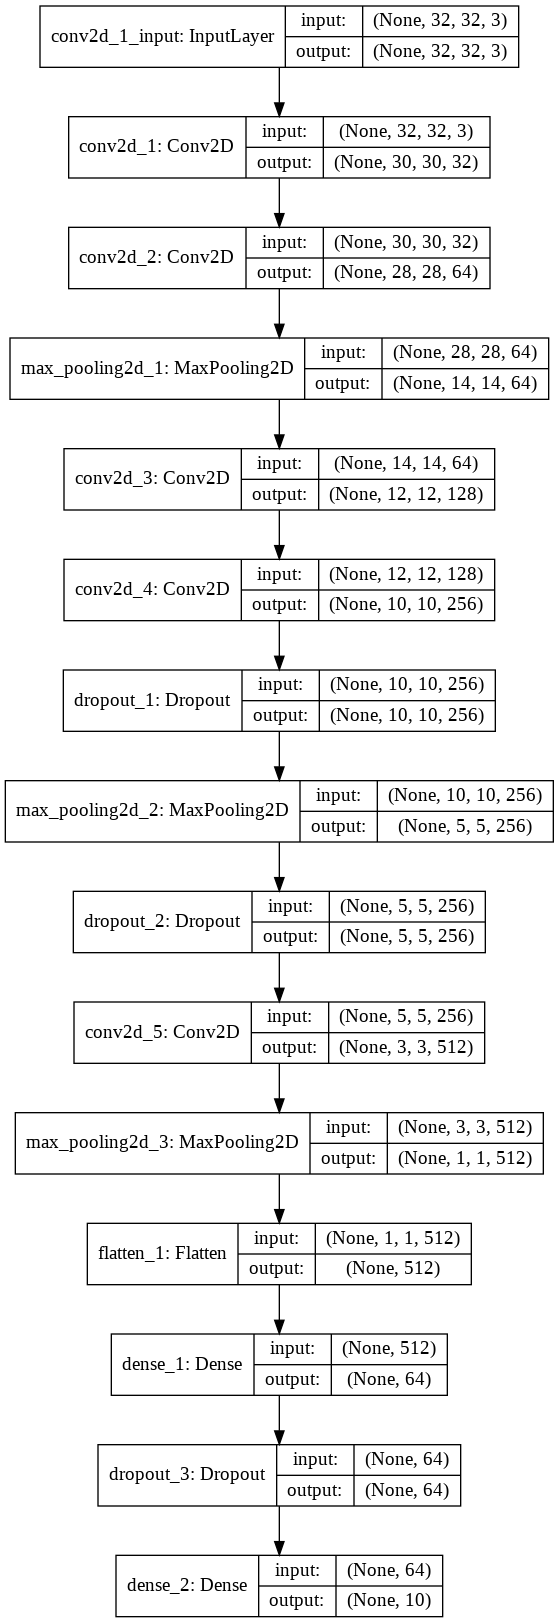

In [12]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)